# California Housing Prices Walkthrough

[source](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

My goal is to use machine learning to predict the house prices in California. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('/Users/katialopes-gilbert/repos/housing-price-prediction/data/housing.csv')

In [3]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Data Definitions**
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [6]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Initial Observations

This is a large dataset with 20,640 records and 10 columns. The first 9 columns, `longitude`, `latitude`, `housing_median_age`, `total_rooms` `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`, contain numerical data. The last column, `ocean_proximity`, contains strings that represent categories. `ocean_proximity` will need to be converted by using encoding.  

`total_bedrooms` contains 207 null values that will need to be dealth with. Since these represent approximately 1% of the overall dataset, I will drop them.

The mean house value is: 206,855.81
The median house value is: 119,600

In [9]:
# drop null values
housing.dropna(how='any', axis=0, inplace=True)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


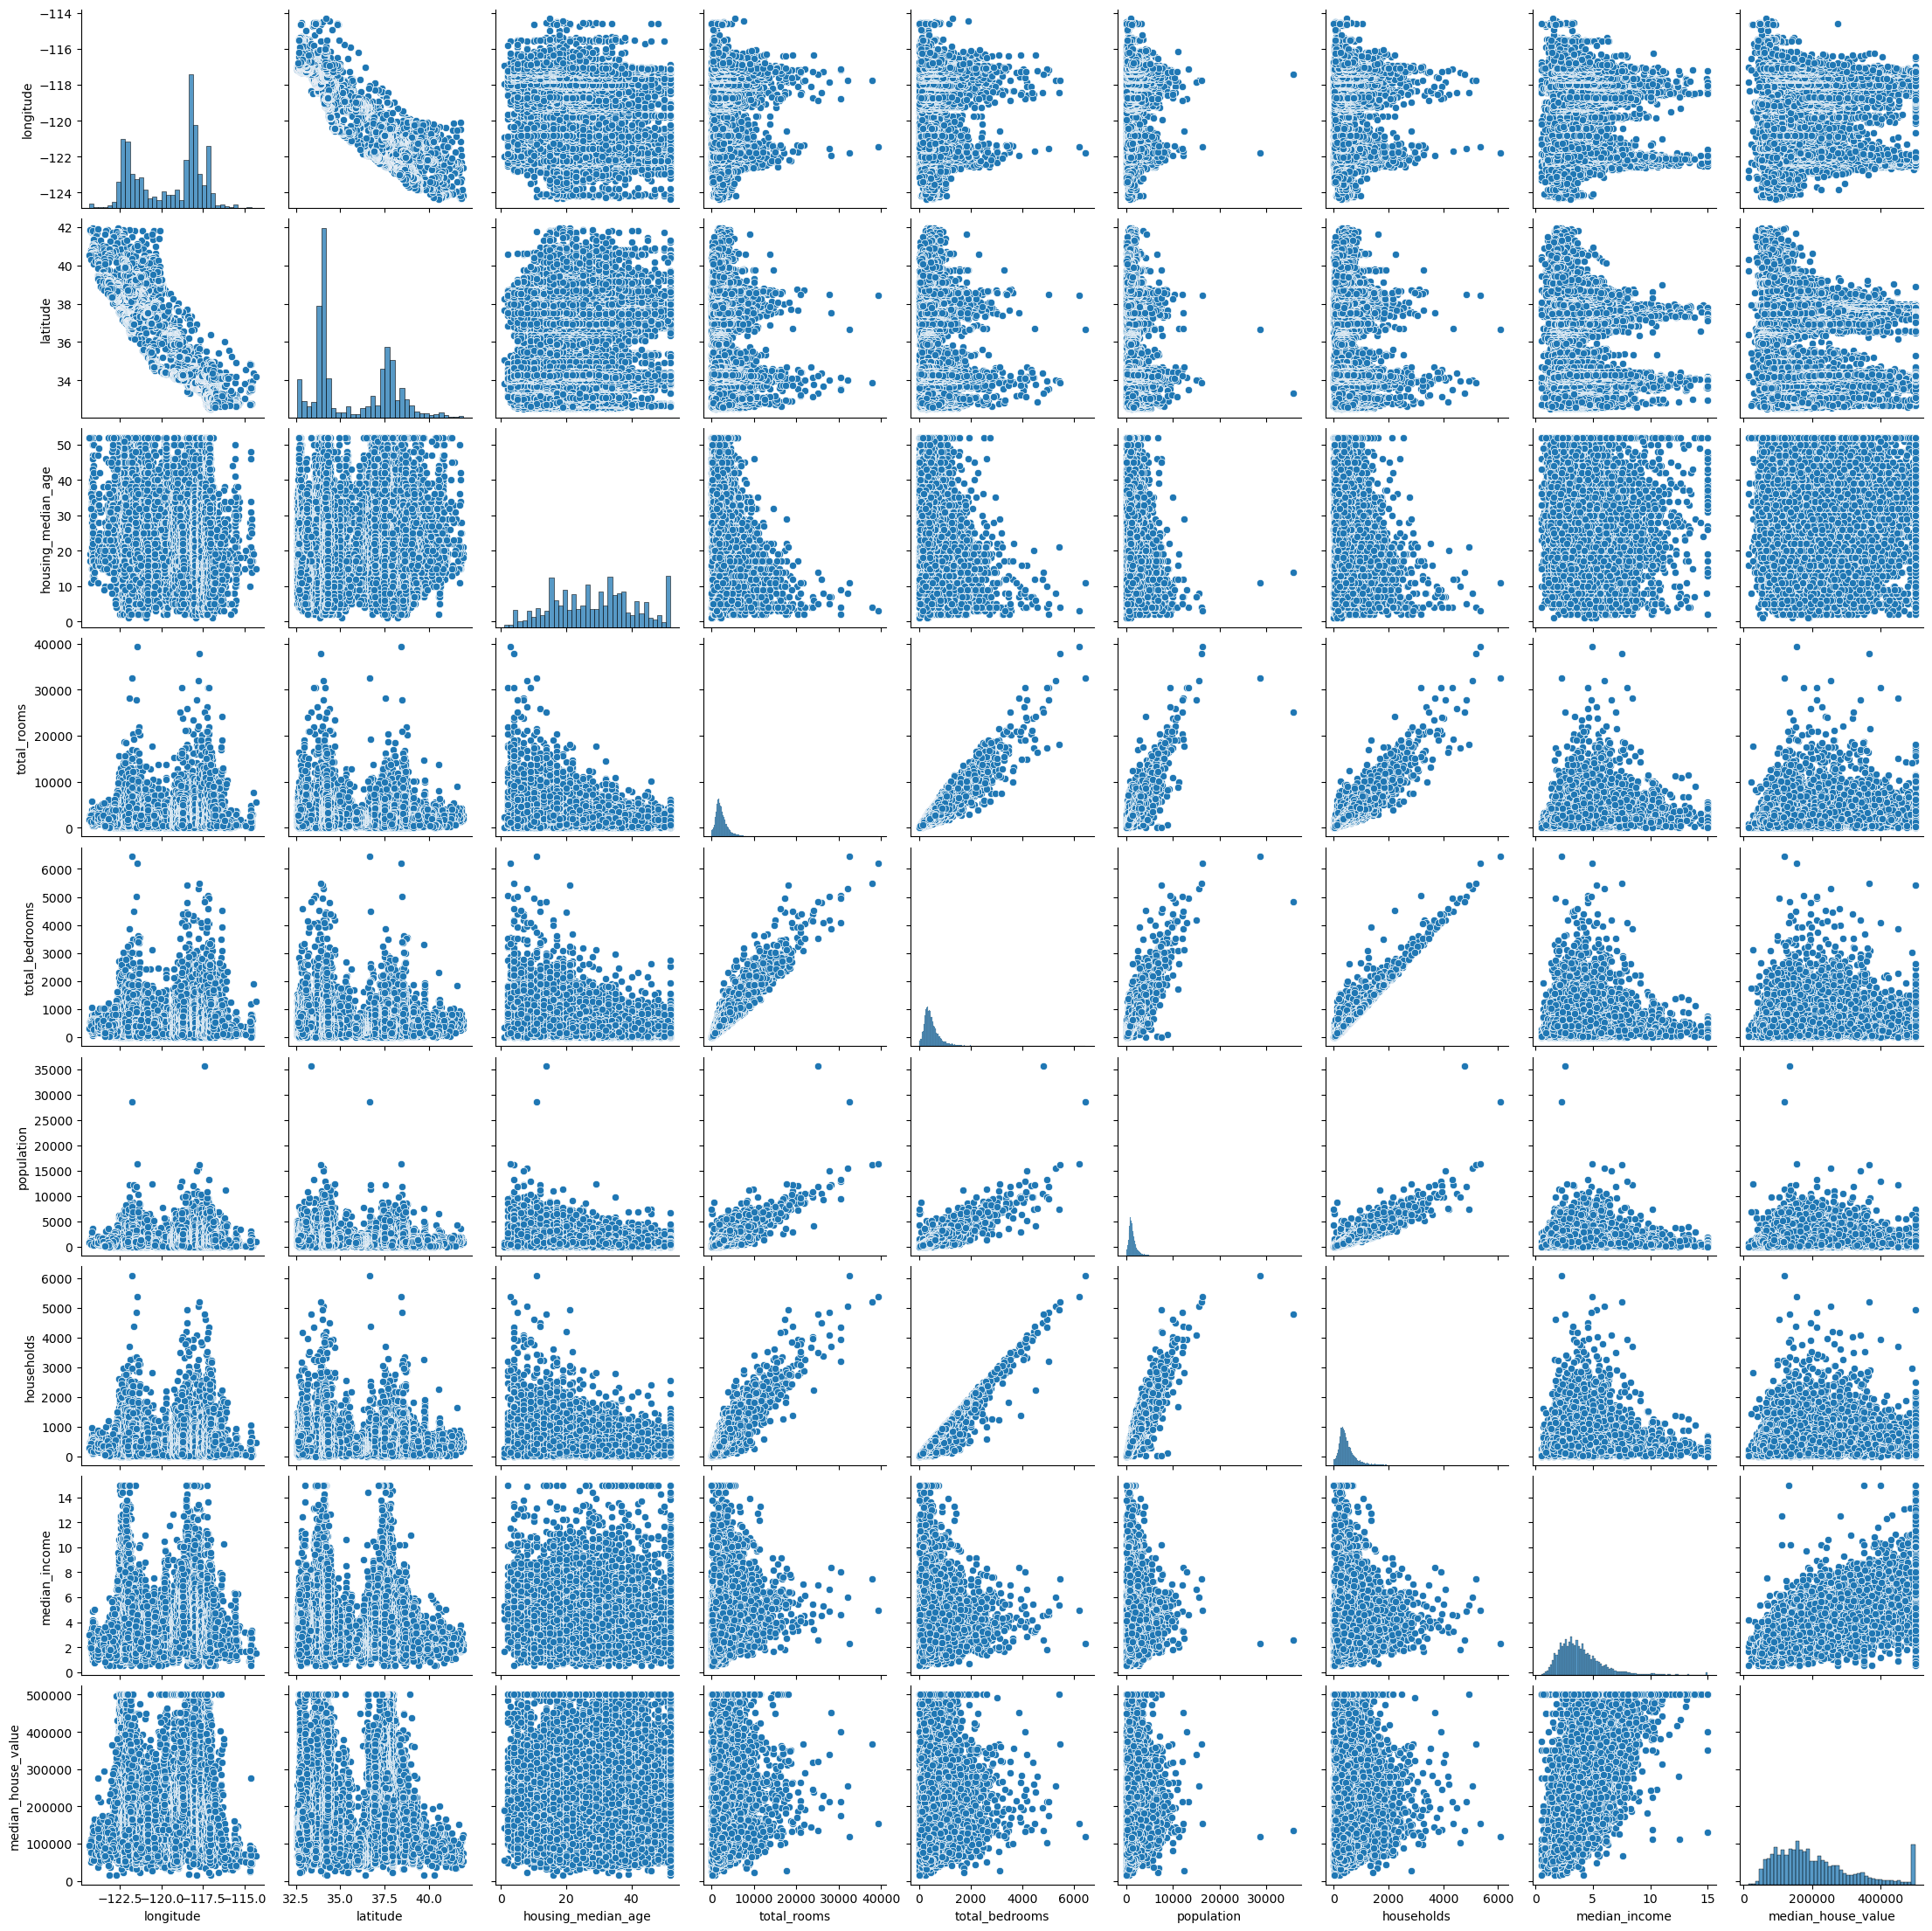

In [11]:
sns.pairplot(housing)

In [12]:
correlation = housing.corr(numeric_only=True)

Text(0.5, 1.0, 'Housing Data Correlation Heatmap')

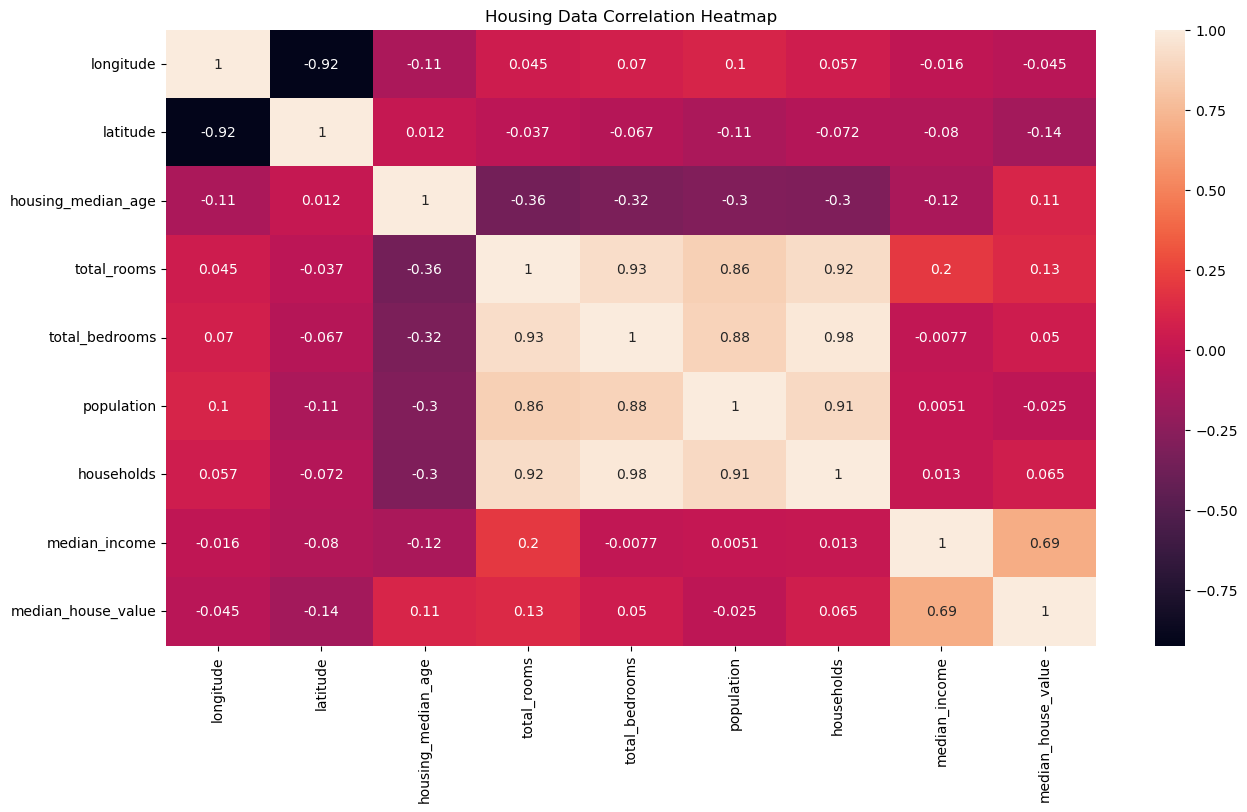

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation, annot=True)
plt.title('Housing Data Correlation Heatmap')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

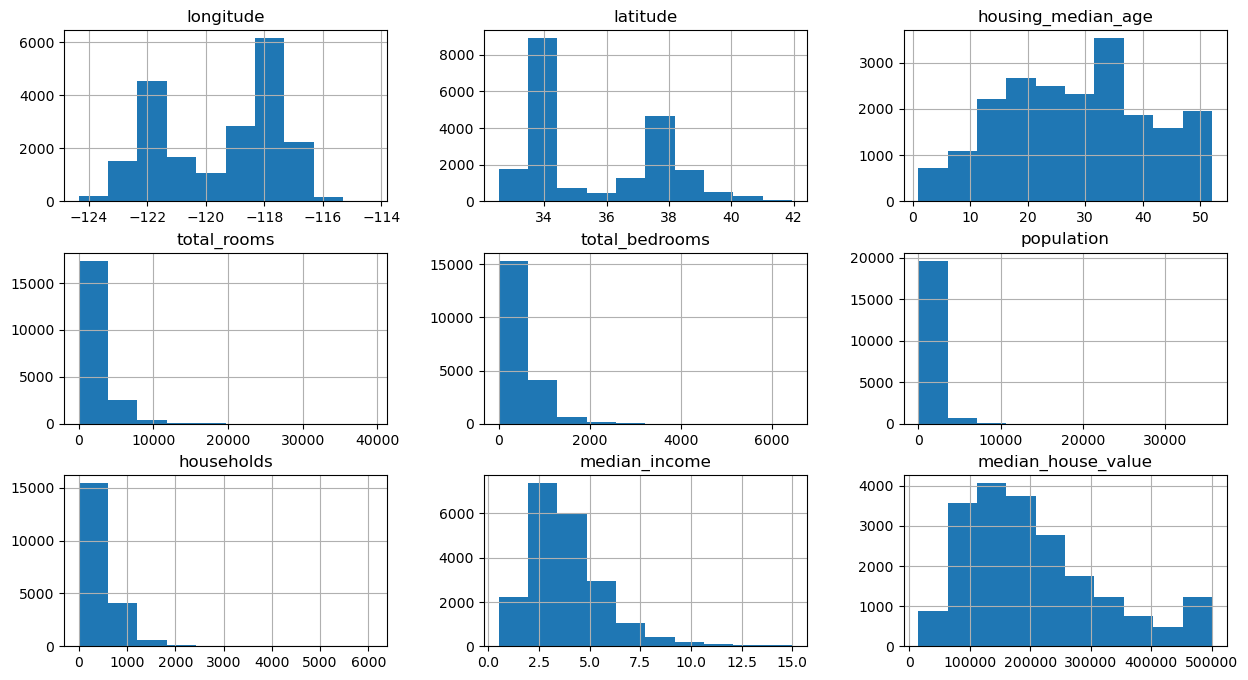

In [14]:
housing.hist(figsize=(15,8))

In [15]:
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for col in columns:
    housing[col] = np.log(housing[col] + 1)

In [16]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,3.258097,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,INLAND
20636,-121.21,39.49,2.944439,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,INLAND
20637,-121.22,39.43,2.890372,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,INLAND
20638,-121.32,39.43,2.944439,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,INLAND


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>]], dtype=object)

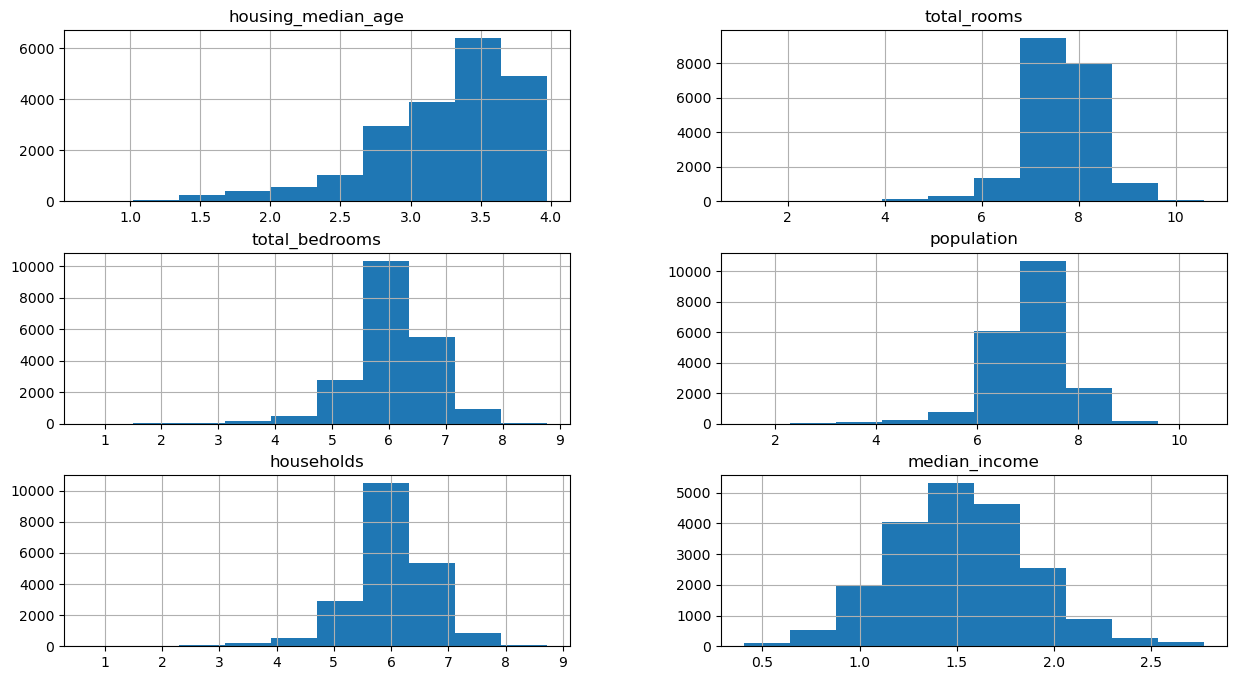

In [17]:
housing[columns].hist(figsize=(15,8))

In [18]:
ocean_encoding = pd.get_dummies(housing['ocean_proximity'], dtype=int)

In [19]:
training_data = housing.join(ocean_encoding)

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,3.737670,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY
1,-122.22,37.86,3.091042,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY
2,-122.24,37.85,3.970292,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY
3,-122.25,37.85,3.970292,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY
4,-122.25,37.85,3.970292,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,3.258097,7.418181,5.926926,6.740519,5.802118,0.940124,78100.0,INLAND
20636,-121.21,39.49,2.944439,6.548219,5.017280,5.877736,4.744932,1.268861,77100.0,INLAND
20637,-121.22,39.43,2.890372,7.720905,6.186209,6.915723,6.073045,0.993252,92300.0,INLAND
20638,-121.32,39.43,2.944439,7.528869,6.016157,6.609349,5.857933,1.053336,84700.0,INLAND


In [21]:
housing = housing.drop(columns=['ocean_proximity'])

Text(0.5, 1.0, 'Housing Data Correlation Heatmap')

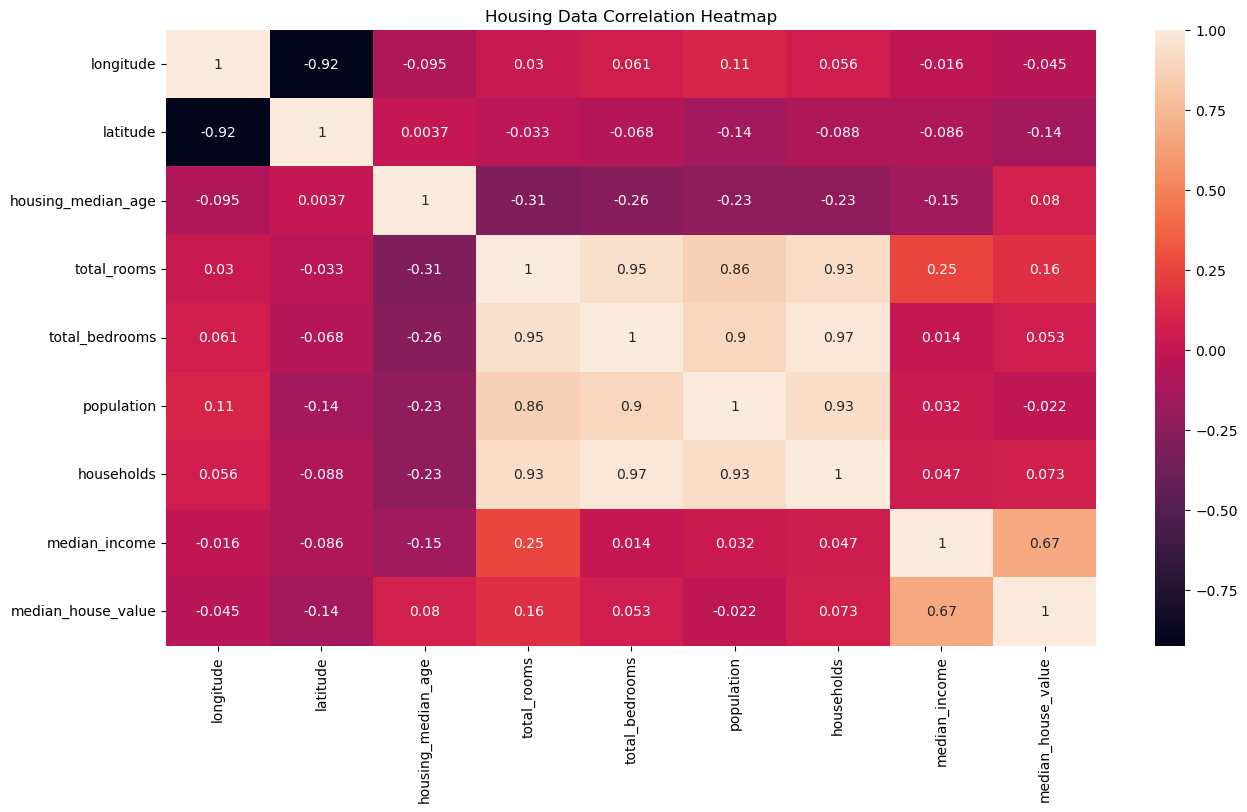

In [22]:
correlation = housing.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation, annot=True)
plt.title('Housing Data Correlation Heatmap')

<Axes: xlabel='latitude', ylabel='longitude'>

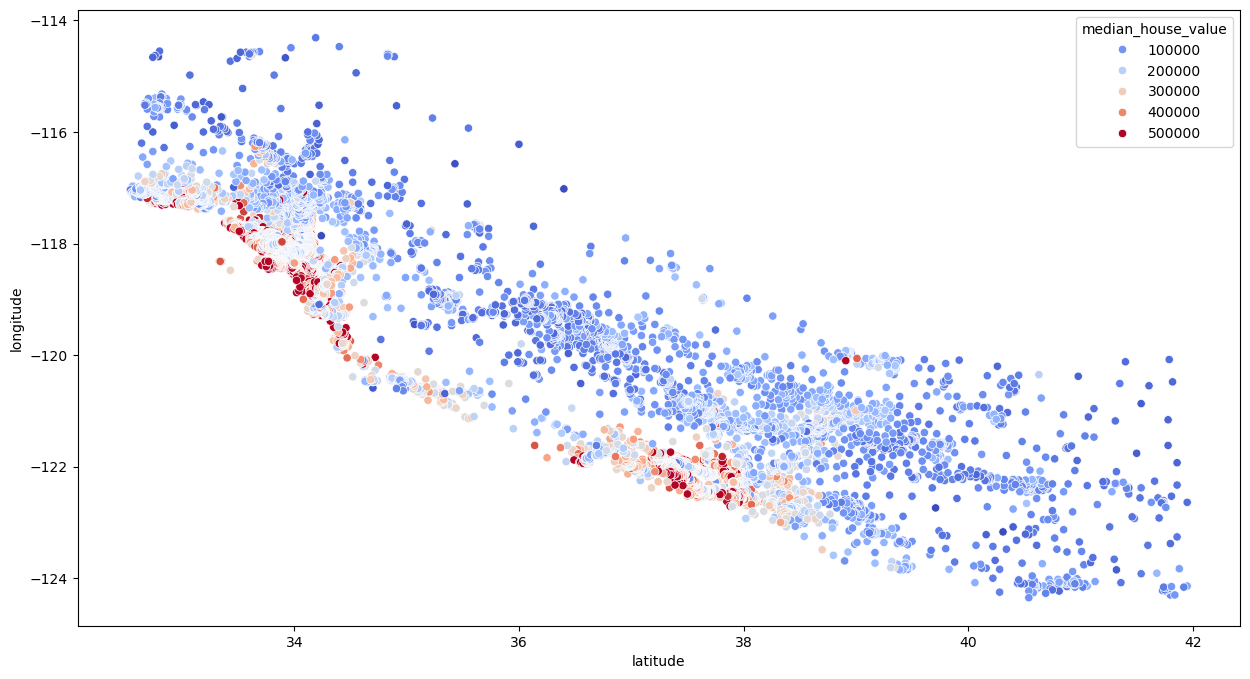

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=housing, hue='median_house_value', palette='coolwarm')

### Feature Engineering

In [24]:
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['household_rooms'] = housing['total_rooms'] / housing['households']

Text(0.5, 1.0, 'Housing Data Correlation Heatmap')

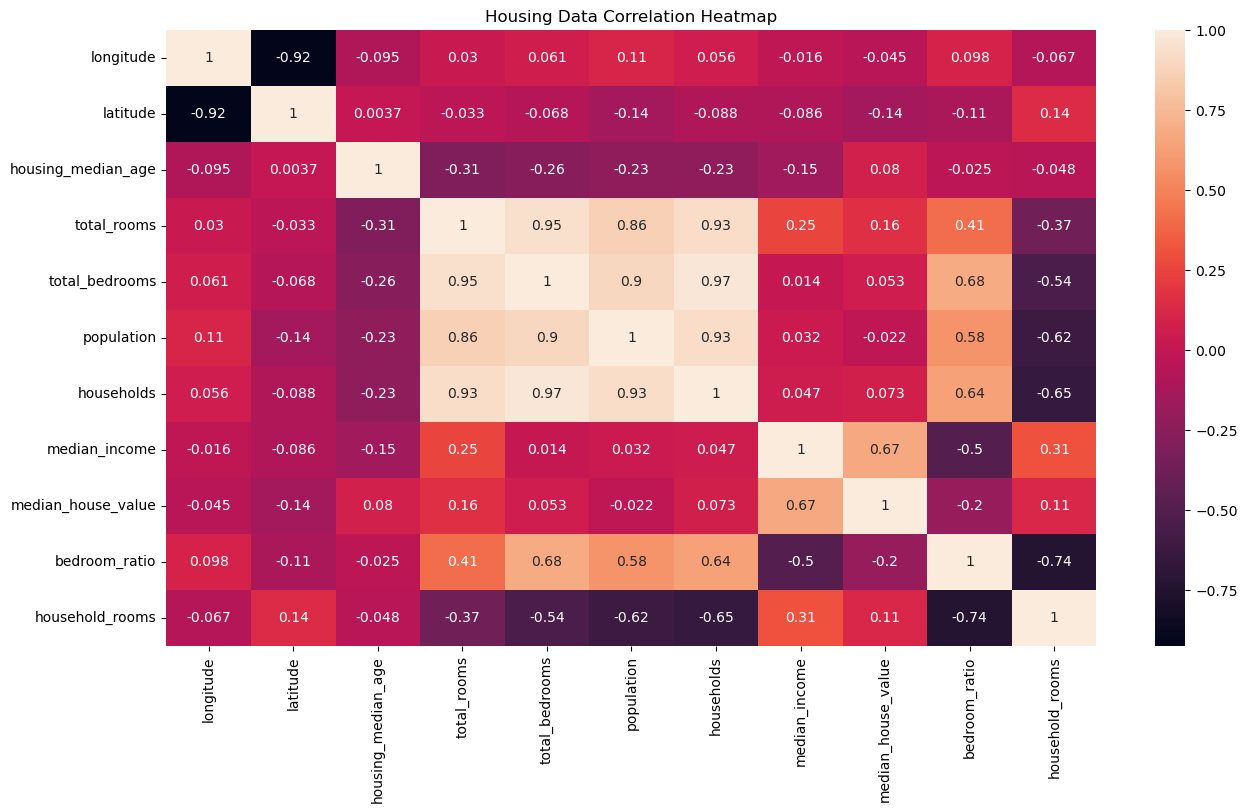

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(housing.corr(), annot=True)
plt.title('Housing Data Correlation Heatmap')

## Split data into X and y training and testing groups

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_train: 16346
Length of y_train: 16346
Length of X_test: 4087
Length of y_test: 4087


### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [32]:
accuracy = reg.score(X_train, y_train)
accuracy

0.6333240920197702

In [33]:
accuracy_test = reg.score(X_test, y_test)
accuracy_test

0.6292934209082056

In [34]:
y_predict = reg.predict(X_test)

In [35]:
y_predict

array([249522.15140887, 141917.92494652, 213098.27244453, ...,
       131213.98027845, 162941.6092731 , 156881.79733703])

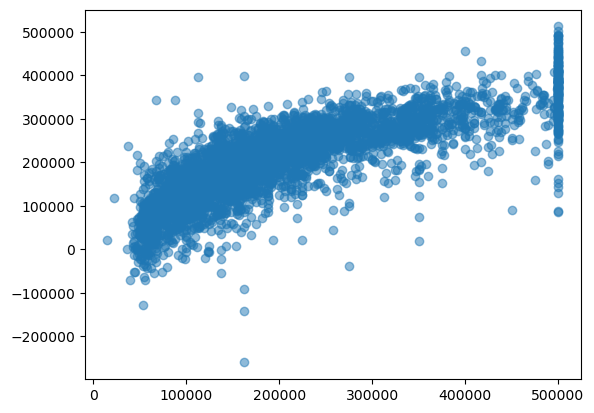

In [36]:
plt.scatter(x=y_test, y=y_predict, alpha=0.5)

### After scaling data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [40]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [41]:
accuracy = reg.score(X_train_s, y_train)
accuracy

0.6333240920197702

In [42]:
accuracy_test = reg.score(X_test_s, y_test)
accuracy_test

0.6292013515926973

### Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
forest.score(X_train, y_train)

0.9733459039040918

In [46]:
forest.score(X_test, y_test)

0.8065217175093529

In [47]:
y_predict_forest = forest.predict(X_test)

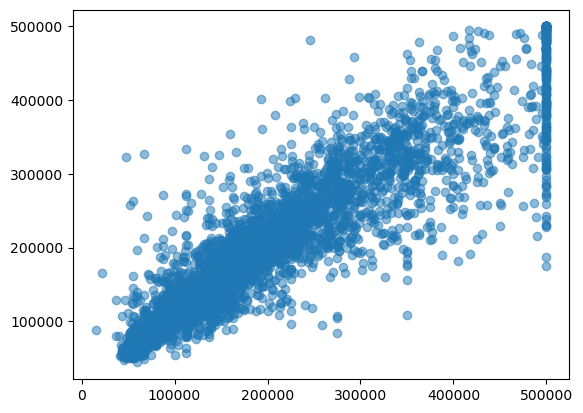

In [48]:
plt.scatter(x=y_test, y=y_predict_forest, alpha=0.5)

In [49]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [50]:
print(forest.score(X_train_s, y_train))
print(forest.score(X_test_s, y_test))

0.9732908072596093
0.769438217553271


### Grid search with cross validation

In [51]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [52]:
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
best_forest = grid_search.best_estimator_

In [54]:
best_forest.score(X_test_s, y_test)

0.7742614652048849